# 1.Domain Knowledge about Dataset
Dataset is Haberman's Survival Data
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Number of Instances: 306
Number of Attributes: 4 (including the class attribute)
Attribute Information:
1st column : Age of patient at time of operation (numerical)
2nd column : Patient's year of operation (year - 1900, numerical)
3rd column : Number of positive axillary nodes detected (numerical)
4th column : Survival status : 2 class labels (1,2)
(class attribute) 1 = the patient survived 5 years or longer
(class attribute) 2 = the patient died within 5 year

In [64]:
#IMPORTING Libraries needd for EDA 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [65]:
#Reading the haberman file
haberman=pd.read_csv("C:/Users/sunilkumar/Desktop/Python_Tutorial/Datasets/haberman.csv")

In [66]:
#Disply column names present in dataset
print(haberman.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [67]:
#Header is not we have to insert the header
haberman.columns=['age', 'year_of_operation', 'aux_nodes_detected', 'survival_status']

In [68]:
haberman.columns

Index(['age', 'year_of_operation', 'aux_nodes_detected', 'survival_status'], dtype='object')

In [69]:
#To see the format of data
haberman.head()

,age,year_of_operation,aux_nodes_detected,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [11]:
haberman.tail()

,age,year_of_operation,aux_nodes_detected,survival_status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [12]:
haberman.describe()

,age,year_of_operation,aux_nodes_detected,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [14]:
#To see how many rows and columns present in the dataset
haberman.shape
#305 rows and 4 columns present in the dataset

(305, 4)

In [15]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age                   305 non-null int64
year_of_operation     305 non-null int64
aux_nodes_detected    305 non-null int64
survival_status       305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [18]:
#checking for any missing values
haberman.isnull().sum()

age                   0
year_of_operation     0
aux_nodes_detected    0
survival_status       0
dtype: int64

Observation: dataset has no mising values for any column

In [22]:
#checking how many values does class has
haberman["survival_status"].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

Observation: Out of 305 patients, 224 survived and 81 not survived died within 5 years after surgery done

# Objective :
The objective is to predict wether the patient will survive for more than 5 years or not given patient's Age, year of of operation,and Number of positive axillary nodes detected. This given Problem is classification problem, where we have to classify the data in any one of the two class label.

# Univariate Analysis
PDF's and CDF's

In [86]:
#Seperating the survived and not_Survived data
survived_patients = haberman[haberman['survival_status'] == 1]
not_survived_patients = haberman[haberman['survival_status'] == 2]

In [87]:
#Checking whether data is splitted properly or not
survived_patients.head()

,age,year_of_operation,aux_nodes_detected,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [71]:
not_survived_patients.head()

,age,year_of_operation,aux_nodes_detected,survival_status
6,34,59,0,2
7,34,66,9,2
23,38,69,21,2
33,39,66,0,2
42,41,60,23,2


Text(0.5, 1.0, 'Survival Status Bases on year_of_operation')

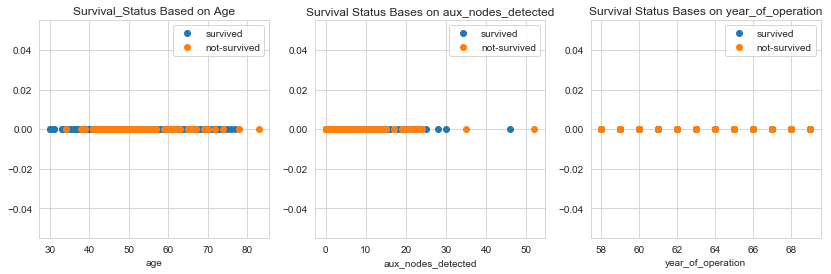

In [72]:
plt.figure(2,figsize=(14,4))
plt.subplot(131)
plt.plot(survived_patients['age'],np.zeros_like(survived_patients['age']),'o',label='survived')
plt.plot(not_survived_patients['age'],np.zeros_like(not_survived_patients['age']),'o',label='not-survived')
plt.legend()
plt.xlabel('age')
plt.title('Survival_Status Based on Age')

plt.subplot(132)
plt.plot(survived_patients['aux_nodes_detected'],np.zeros_like(survived_patients['aux_nodes_detected']),'o',label='survived')
plt.plot(not_survived_patients['aux_nodes_detected'],np.zeros_like(not_survived_patients['aux_nodes_detected']),'o',label='not-survived')
plt.legend()
plt.xlabel('aux_nodes_detected')
plt.title('Survival Status Bases on aux_nodes_detected')

plt.subplot(133)
plt.plot(survived_patients['year_of_operation'],np.zeros_like(survived_patients['year_of_operation']),'o',label='survived')
plt.plot(not_survived_patients['year_of_operation'],np.zeros_like(not_survived_patients['year_of_operation']),'o',label='not-survived')
plt.legend()
plt.xlabel('year_of_operation')
plt.title('Survival Status Bases on year_of_operation')

Observation: Fully overlapped we cant say much

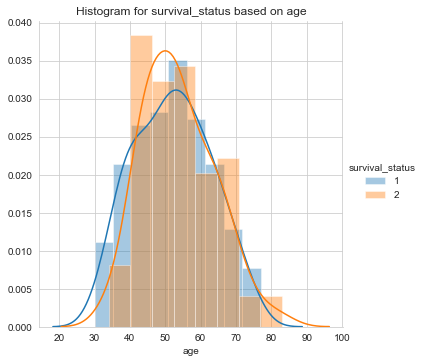

In [73]:
sns.FacetGrid(haberman, hue="survival_status", size=5).map(sns.distplot, "age").add_legend()
plt.title('Histogram for survival_status based on age')
plt.show()

# Observation
1. 40 to 45 years aged persons mostly not_survived among all other aged person.
2. 30 to 34 years aged persons mostly 100 persent survived among all other aged persons.
3. 78 to 82 aged persons not_survived within 5 years
4. 30 to 40 age there better chances to survive after 5 yeras


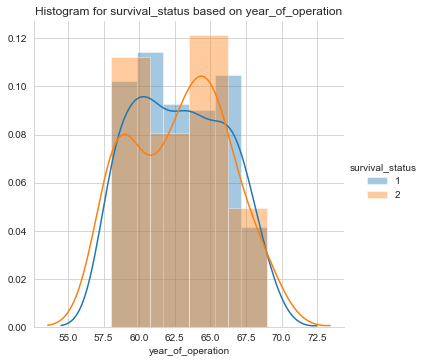

In [74]:
sns.FacetGrid(haberman, hue="survival_status", size=5).map(sns.distplot, "year_of_operation").add_legend()
plt.title('Histogram for survival_status based on year_of_operation')
plt.show()

# Observation
1. Patient who got operated in between 1958-1963 or 1966-1968 are more likely to survive more than 5 years.
2. Patient who got operated in between 1963-1966 might not survive more than 5 years.

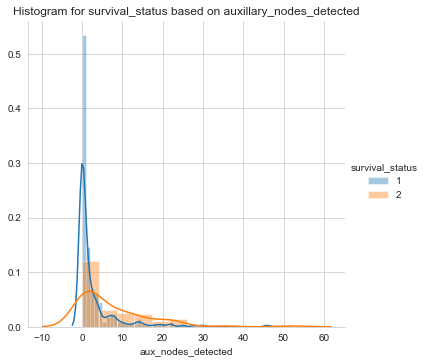

In [75]:
sns.FacetGrid(haberman, hue="survival_status", size=5).map(sns.distplot, "aux_nodes_detected").add_legend()
plt.title('Histogram for survival_status based on auxillary_nodes_detected')
plt.show()

# Observation
1. Patient having less than 5 auxillary nodes are more likely to survive more than 5 years.
2. Patient having more than 5 auxillary nodes might not survive more than 5 years.

==============================SURVIVED_PATIENT==============================
********* age *********
Bin Edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF: [0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
CDF: [0.04910714 0.15625    0.28125    0.375      0.54017857 0.70535714
 0.79910714 0.91071429 0.97321429 1.        ]
==============================NOT_SURVIVED_PATIENT==============================
Bin Edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
CDF: [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]
==============================SURVIVED_PATIENT==============================
********* year_of_operation *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.1875     0.10714286

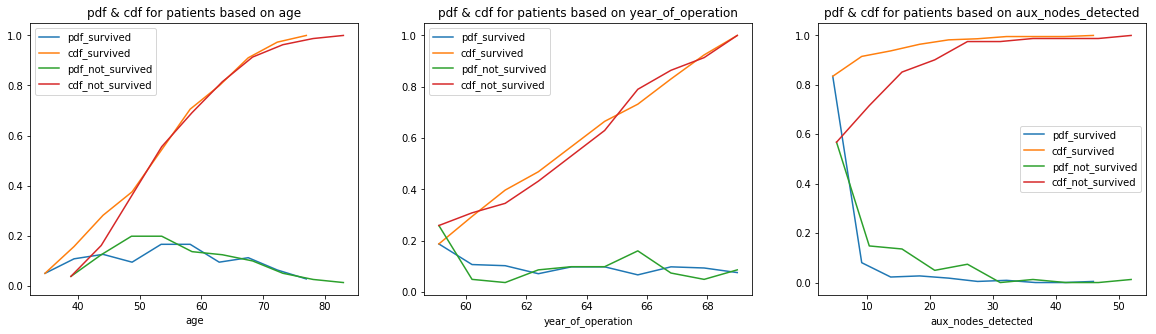

In [45]:
plt.figure(3,figsize=(20,5))
for idx, feature in enumerate(list(survived_patients.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    
    print("="*30+"SURVIVED_PATIENT"+"="*30)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(survived_patients[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, label = 'pdf_survived')
    plt.plot(bin_edges[1:], cdf, label= 'cdf_survived')
    
    print("="*30+"NOT_SURVIVED_PATIENT"+"="*30)
    counts, bin_edges = np.histogram(not_survived_patients[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, label = 'pdf_not_survived')
    plt.plot(bin_edges[1:], cdf, label= 'cdf_not_survived')
    
    plt.title('pdf & cdf for patients based on '+feature)
    plt.legend()
    plt.xlabel(feature)

# Observation:
1. By seeing age PDF plot there is not data available after 78 age for survived means no chances for survive.
2. No dependency on year of operation
3. if the number aux_nodes increases there will be no chances for survived
4. 45 to 50 there will be no chance for survived

# BOX PLOT

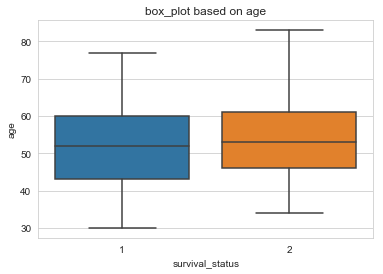

In [76]:
sns.boxplot(x='survival_status',y='age', data=haberman)
plt.title('box_plot based on age')
plt.show()

# Observation:
1. Mean average age of survived is 52
2. Mean average age of not_survived is 53
3. IQR is high for survived


Text(0.5, 1.0, 'box_plot based on year_of_operation')

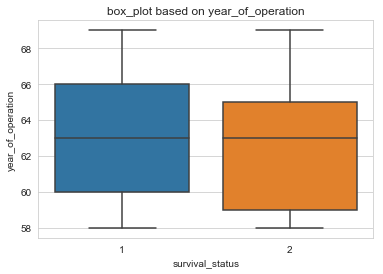

In [77]:
sns.boxplot(x='survival_status',y='year_of_operation', data=haberman)
plt.title('box_plot based on year_of_operation')

Text(0.5, 1.0, 'box_plot based on auxillary_nodes_detected')

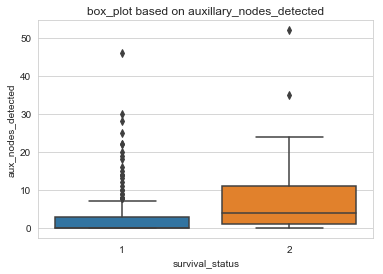

In [78]:
sns.boxplot(x='survival_status',y='aux_nodes_detected', data=haberman)
plt.title('box_plot based on auxillary_nodes_detected')

# Observation: 
Outliers has an impact on mean of survival status

# Violin Plot

Text(0.5, 1.0, 'violin_plot based on age')

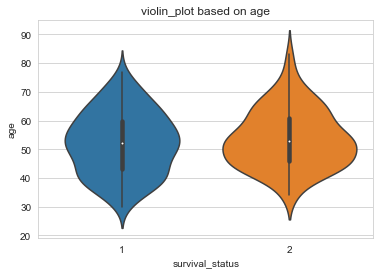

In [79]:
sns.violinplot(x="survival_status", y="age", data=haberman, size=8)
plt.title('violin_plot based on age')

# Observation:
age distribution for survived and not_survived are almost equal

Text(0.5, 1.0, 'violin_plot based on year_of_operation')

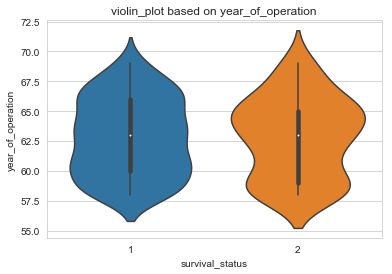

In [80]:
sns.violinplot(x="survival_status", y="year_of_operation", data=haberman, size=8)
plt.title('violin_plot based on year_of_operation')

Text(0.5, 1.0, 'violin_plot based on auxillary_nodes_detected')

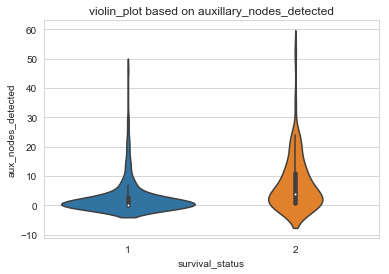

In [81]:
sns.violinplot(x="survival_status", y="aux_nodes_detected", data=haberman, size=8)
plt.title('violin_plot based on auxillary_nodes_detected')

# Observation
Variation of survived is less than the variation of the not_survived

# Pair Plot

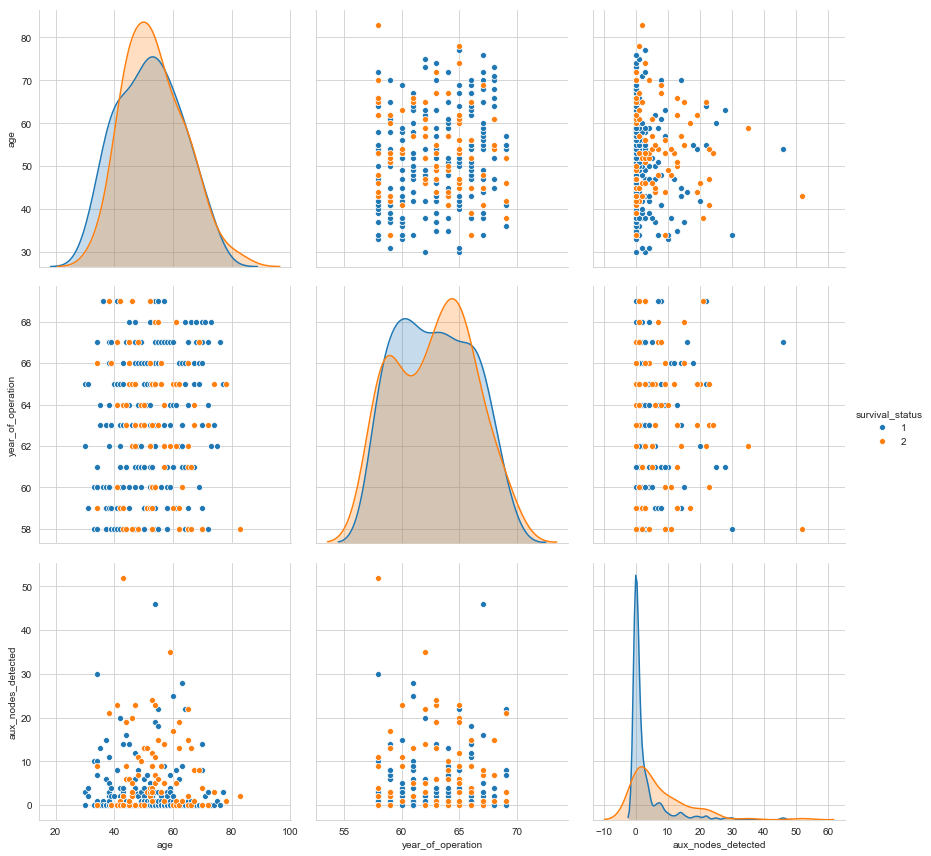

In [82]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="survival_status",vars=['age','year_of_operation','aux_nodes_detected'], size=4)
plt.show()

Observation:
    Patients having age less than 40 years are more probable to live more than five years. (from year_of_operation vs age graph)

# Contour Plot

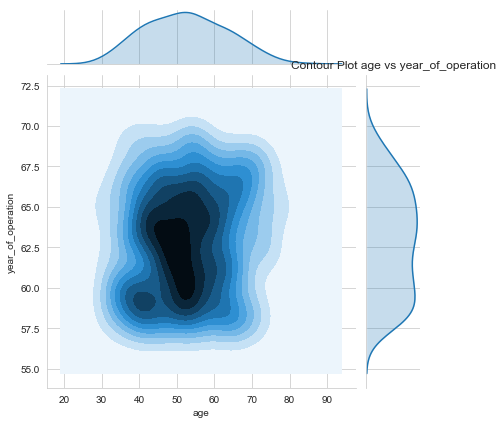

In [83]:
sns.jointplot(x="age", y="year_of_operation", data=haberman, kind="kde")
plt.title('Contour Plot age vs year_of_operation')
plt.show()

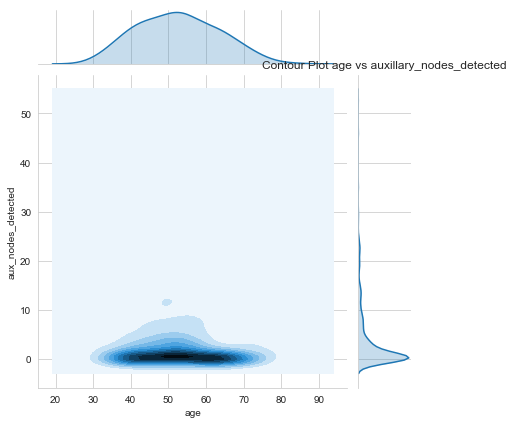

In [84]:
sns.jointplot(y="aux_nodes_detected", x="age", data=haberman, kind="kde")
plt.title('Contour Plot age vs auxillary_nodes_detected')
plt.show()

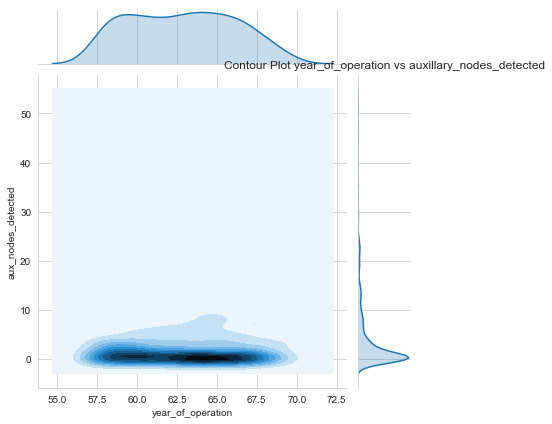

In [85]:
sns.jointplot(x="year_of_operation", y="aux_nodes_detected", data=haberman, kind="kde");
plt.title('Contour Plot year_of_operation vs auxillary_nodes_detected')
plt.show()

# Observation
1. Patients aged between 40-60 are mostly operated in between 1960-1964.
2. Patients with more than 5 auxillary nodes are rare.
3. MOst of the 40 to 50 age people are having 0 aux nodes
4. Patients operated between 60 to 65 year has aux nodes less than 5

# Overall Observation

1. Patients having age less than 40 years are more probable to Survive
2. Patients with less number of auxillary nodes detected are more probable to survive
3. More than 75% of the patients have auxillary nodes less than 10.